# <center>Cleaning, NLP and Advance NLP for Side-Effects Study</center>

### 1. Cleaning the data.
The first column has Gender and Age which will be helpful in further Exploratory data anaylsis. Cleaning the 'Comment' and 'Reviewer' part from the columns is carried out to make data more readable and less redudant. Gender is extraced from the Reviewers Details column and saved in new separate column. Extracting Age is a bit of a challenge since we have too many categories to classify(Working on solution).

In [15]:
dataf = pd.read_csv("C:/Users/admin/Downloads/reviews6.csv", encoding = "ISO-8859-1") #Sample data  of 50 entries
data = dataf['Reviewer_Details'].tolist()
datac = dataf['Comment'].tolist()
#data2 = dataf.take([0], axis=1)
#data2

In [16]:
i = 0
idx = 0
temp = []
withoutGenderString = []
withoutGenderStringTemp = []
genderSequence = []
#for i in range(len(data)):
#    temp = re.split(r'\s', data[i])
#    for idx in range(len(temp)):
#        if(temp[idx].lower().find('male') != -1 or temp[idx].lower().find('female') != -1):
#            print('There\'s Something here', idx)
#            print("lower data[i] : ",temp)
#        pass
data = dataf['Reviewer_Details'].tolist()
age = []

for d in data:
    #print(d)
    regex = r"\d\d-\d\d|\d\d\s(?:or over)"
    searchObj = re.search( regex, d, re.M|re.I)
    if searchObj:
        #print ("search --> searchObj.group() : ", searchObj.group())
        age.append(searchObj.group())
    else:
        #print ("Nothing found!!")
        age.append("-")

dataf['Age']=age
print(dataf)

#myfile.to_csv(r'new_sample.csv')      #Writting to a csv file to get a sample file
for i in range(len(data)):
    withoutGenderStringTemp = ""
    genderInstance = ""
    
    ##Age Code Start
   # regex = r"\d\d-\d\d"
    #searchObj = re.search( regex, d, re.M|re.I)
    #if searchObj:
        #print ("search --> searchObj.group() : ", searchObj.group())
        #age.append(searchObj.group())
    #else:
        #print ("Nothing found!!")
        #age.append("-")
    ##Age Code Ends
    
    
    if('male' in data[i].lower() or 'female' in data[i].lower()):
        temp = re.split(r'\s', data[i])
        #print("Something's There : ",i)
        for idx in range(len(temp)):
            tempStr = temp[idx].lower()
            withoutGenderStringTemp = tempStr
            if(tempStr.find('male') != -1):
                genderInstance = "Male"
                #print('There\'s Popping at this index to get the comment without gender', idx)
                withoutGenderStringTemp = ""                           #Getting the comment without Gender 
            if(tempStr.find('female') != -1):
                genderInstance = "Female"
                #print('There\'s Popping at this index to get the comment without gender', idx)
                withoutGenderStringTemp = ""                           #Getting the comment without Gender
                #print("lower data[i] : ",temp)
            withoutGenderStringTemp = "".join(withoutGenderStringTemp)
    else:
        withoutGenderStringTemp = data[i]
        #print("Nothings there : ",i,data[i])
        genderInstance = "NA"
    genderSequence.append(genderInstance)                              #Col-wise gender from the comments
    
    withoutGenderString.append(withoutGenderStringTemp)                #Comments without Gender

#print(withoutGenderString)
#print("-----------------------------------------------------------")
#print(genderSequence)

                                     Reviewer_Details   Effectiveness_Rating  \
0   Reviewer: Newbie | 35-44 on Treatment for 1 to...                      2   
1   Reviewer: 45-54 on Treatment for less than 1 m...                      1   
2   Reviewer: Ocetech| 65-74 Male  on Treatment fo...                      1   
3   Reviewer: virleo| 55-64 Female  on Treatment f...                      1   
4   Reviewer: Diane perrin| 65-74 on Treatment for...                      5   
5   Reviewer: Mtdwnurse1| 45-54 Female  on Treatme...                      4   
6   Reviewer: meposide|  Male  on Treatment for 5 ...                      1   
7   Reviewer: FBigPharma| 35-44 on Treatment for 1...                      2   
8   Reviewer: Foots55| 65-74 Female  on Treatment ...                      3   
9   Reviewer: GoneRacin24| 65-74 Female  on Treatm...                      1   
10  Reviewer: 75 or over Male  on Treatment for le...                      2   
11  Reviewer: Karen | 45-54 on Treatment

In [17]:
x=[]
for item in data:
    x.append(item.strip("Reviewer:"))
#print(x)


In [18]:
y=[]
for item in datac:
    yt = (item.strip("Comment:"))
    y.append(yt.strip("Hide Full Comment"))
#print(y)

In [19]:
dataf['Reviewer_Details']=x
dataf['Comment']=y
dataf['Gender'] = genderSequence
dataf['Age'] = age

In [20]:
dataf

,Reviewer_Details,Effectiveness_Rating,Ease_of_Use_Rating,Satisfaction_Rating,Comment,Age,Gender
0,Newbie | 35-44 on Treatment for 1 to 6 months...,2,2,1,DidnÃ¢??t rich the neevevosin ! Wastef,35-44,NA
1,45-54 on Treatment for less than 1 month (Pat...,1,5,1,I was prescribed this for the nerve pain that ...,45-54,NA
2,Ocetech| 65-74 Male on Treatment for 10 year...,1,4,2,Tramadol does help a bit with the ghost pain i...,65-74,Male
3,virleo| 55-64 Female on Treatment for less t...,1,1,1,A few years ago a doctor at an urgent care cli...,55-64,Female
4,Diane perrin| 65-74 on Treatment for 2 to les...,5,5,5,I couldn't be happier with this medication. I ...,65-74,NA
5,Mtdwnurse1| 45-54 Female on Treatment for 6 ...,4,4,4,After my neck fusion to my cervical C5|6|7| bo...,45-54,Female
6,meposide| Male on Treatment for 5 to less t...,1,3,2,,-,Male
7,FBigPharma| 35-44 on Treatment for 1 to 6 mon...,2,2,1,Try being perscribed 120 20MG OxyCodone a mont...,35-44,NA
8,Foots55| 65-74 Female on Treatment for 1 to ...,3,2,2,Itâs been ok but had others that worked better,65-74,Female
9,GoneRacin24| 65-74 Female on Treatment for 1...,1,5,1,Severe neuropathic pain in left leg into my to...,65-74,Female


In [21]:
dataf.to_csv(r'C:/Users/admin/Downloads/sample.csv')      #Writting to a csv file to get a sample file

### 2. EDA: Exploratory Data Analysis


 1. Done to detect mistakes
 2. Confirm Assumptions
 3. Detect relationship between exploratory variables and outcome varibles
 4. Understand the data 
 5. Estimate the best model that could be used for the analysis
 
We did quite extensive research while performing the EDA on the data we obtained. There are few statistics which highlight the trends in the market. We have used charts and graphs from matplotlib to display the findings. These findings helped us to look for specific domains while performing NLP in next phase.

In [1]:
import numpy as np
import pandas as pd

Here we dropped records with null values contained.

In [2]:
df=pd.read_csv("/Users/grv/Downloads/sample_for_all.csv")

In [3]:
# determine which value is null
#df.isnull()

# return any row which has at least one null value
df[df.isnull().any(axis=1)]

# to drop row which has not Age, and werent being able to be dropped in 
df[df.Age != "-"]

# get number of null values in each column
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
969    0
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
Length: 999, dtype: int64

In [4]:

# to drop row which contains any NaN, use how='any'
df.dropna(axis=1, how='any')  

# drop the columns which has less than 3 non-null values
df.dropna(axis=1, thresh=3)

df2=df.dropna(axis=0, how='any')  

#df2

#Verifying if any of the rows have null or missing values
df2.isnull().sum(axis=0)

# Interpolate missing values
df2.interpolate(method='linear')

,Reviewer Details,Effectiveness Rating,Ease_of_Use Rating,Satisfaction Rating,Comment,Age,Gender
0,virleo| 55-64 Female on Treatment for less t...,1,1,1,A few years ago a doctor at an urgent care cli...,55-64,Female
1,Mtdwnurse1| 45-54 Female on Treatment for 6 ...,4,4,4,After my neck fusion to my cervical C5|6|7| bo...,45-54,Female
2,Foots55| 65-74 Female on Treatment for 1 to ...,3,2,2,Its been ok but had others that worked better,65-74,Female
3,GoneRacin24| 65-74 Female on Treatment for 1...,1,5,1,Severe neuropathic pain in left leg into my to...,65-74,Female
4,75 or over Male on Treatment for less than 1...,2,5,1,Pain relief was minimal. I had almost all the ...,75 or over,Male
5,55-64 Female on Treatment for 2 to less than...,5,5,5,I get the ones Mfg Virtus Pharmacey. It is ova...,55-64,Female
6,Suffering| 45-54 Female (Patient),1,3,1,Thanks to Govt im in pain everyday this is lik...,45-54,Female
7,Ketsie| Female on Treatment for 1 to less t...,5,5,5,Took severe pain away. Hand and neck arthritis...,-,Female
8,Ejb1951| 65-74 Female on Treatment for less ...,2,1,1,It helped for a couple days than my mouth & to...,65-74,Female
9,plantGranny| 45-54 Female on Treatment for 6...,1,3,1,Does not have any effect whatsoever on my pain...,45-54,Female


In [5]:
df2=df2.dropna(axis=0, how='any')  
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 7 columns):
Reviewer Details         999 non-null object
 Effectiveness Rating    999 non-null int64
 Ease_of_Use Rating      999 non-null int64
 Satisfaction Rating     999 non-null int64
 Comment                 999 non-null object
Age                      999 non-null object
Gender                   999 non-null object
dtypes: int64(3), object(4)
memory usage: 62.4+ KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# plot charts inline

%matplotlib inline

df2.columns

Index(['Reviewer Details', ' Effectiveness Rating', ' Ease_of_Use Rating',
       ' Satisfaction Rating', ' Comment', 'Age', 'Gender'],
      dtype='object')

This was done to understand the dataset in terms of categories that we acquired from the reviews

In [10]:
df2['Gender'].value_counts()
df2['Age'].value_counts()
df2[' Satisfaction Rating'].value_counts()
df2[' Ease_of_Use Rating'].value_counts()
df2[' Effectiveness Rating'].value_counts()


5    266
4    238
1    203
3    174
2    118
Name:  Effectiveness Rating, dtype: int64

# EDA: Gender #

Here we understand the usage of Analgesics with respect to Gender.
There were twice as number of female analgesics users than the male analgesics user

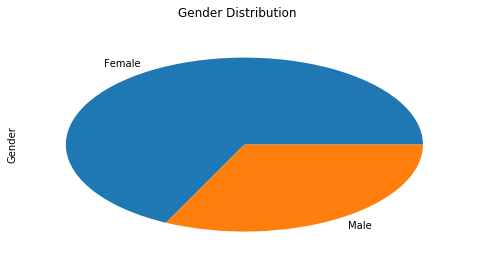

In [11]:
ax = df2.Gender.value_counts().plot.pie(subplots = True,figsize = (8,4), title = "Gender Distribution");

#plot = df3.plot.pie(y='mass', figsize=(5, 5))
#plot = df3.plot.pie(subplots=True, figsize=(6, 3))

# EDA: Age #

Here we understand the usage of Analgesics with respect to Age.
There were more than 50% of the Analgesics users from Age Group 45 to 65

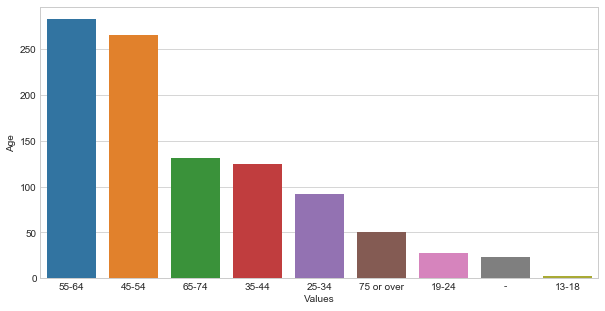

In [21]:
ageColourful = df2['Age'].value_counts().reset_index()
ageColourful.columns = ["Values", "Age"]
ageColourful

# set style
sns.set_style("whitegrid");

plt.figure(figsize = (10,5));
sns.barplot(x = 'Values',y ='Age', data = ageColourful);
plt.show();

# EDA: Effectiveness Rating #

Here we understand the usage of Analgesics with how effective they proved to be to by the reviewers.
Most of the painkillers reviewed either scored too high or too low on the their effectiveness of their use.

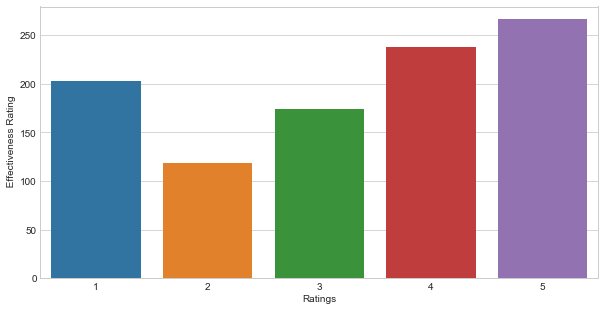

In [17]:
effectivenessRatingColourful = df2[' Effectiveness Rating'].value_counts().reset_index()
effectivenessRatingColourful.columns = ["Ratings", " Effectiveness Rating"]
effectivenessRatingColourful

# set style
sns.set_style("whitegrid");

plt.figure(figsize=(10,5));
sns.barplot(x = 'Ratings',y = ' Effectiveness Rating', data = effectivenessRatingColourful);
plt.show();

# EDA: Satisfaction Rating #

Here we understand the usage of Analgesics with respect to their Satisfaction amongst the reviewers.
Most of the painkillers reviewed, just like ease of using either scored very high or very low on their Satisfaction Index.

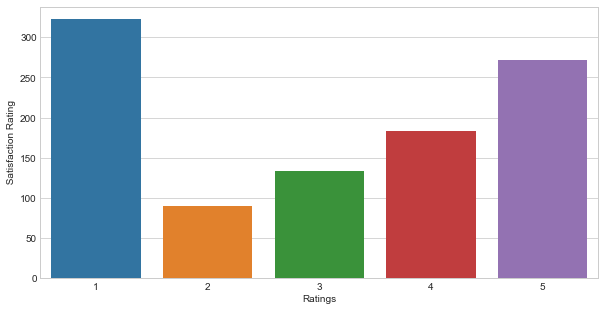

In [20]:
satisfactionRatingColourful = df2[' Satisfaction Rating'].value_counts().reset_index()
satisfactionRatingColourful.columns = ["Ratings", " Satisfaction Rating"]
satisfactionRatingColourful

# set style
sns.set_style("whitegrid");

plt.figure(figsize = (10,5));
sns.barplot(x = 'Ratings',y =' Satisfaction Rating', data = satisfactionRatingColourful);
plt.show();

# EDA: Ease of Use Rating #

Here we understand the usage of Analgesics with respect to their Ease of Usage.
Most of the painkillers reviewed scored high on the scale of their scale of their ease of using.

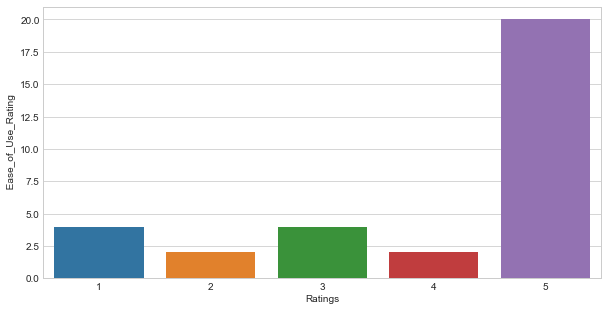

In [48]:
easeOfUseRatingColourful = df2[' Ease_of_Use_Rating'].value_counts().reset_index()
easeOfUseRatingColourful.columns = ["Ratings", " Ease_of_Use_Rating"]
easeOfUseRatingColourful

# set style
sns.set_style("whitegrid");

plt.figure(figsize = (10,5));
sns.barplot(x = 'Ratings',y = " Ease_of_Use_Rating", data = easeOfUseRatingColourful);
plt.show();

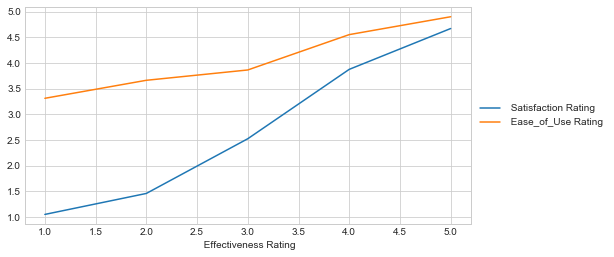

In [22]:
# line chart
    #not sure if this adds any value to our project - but did it anyway

df2.groupby(' Effectiveness Rating')[' Satisfaction Rating',' Ease_of_Use Rating'].mean().plot(kind='line', figsize=(8,4))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5));  # set legend


1. There is a very less correlation of **ease-of-use** to **satisfaction rating** as per this chart
2. But if we compare **satisfaction rating** with **effectivenss rating** , they are highly correlated.

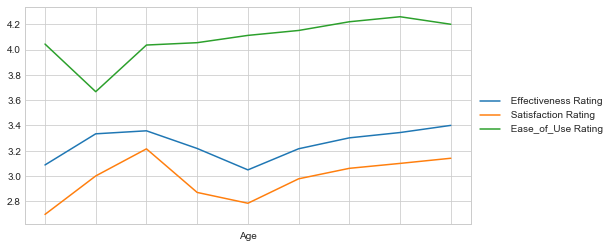

In [23]:
# line chart

df2.groupby('Age')[' Effectiveness Rating',' Satisfaction Rating', ' Ease_of_Use Rating'].mean().plot(kind='line', figsize=(8,4))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5));  # set legend


In [27]:
df2corr = df2.corr()
df2corr
#df3 = df2.drop(['Unnamed: 0'], axis=1)

,Effectiveness Rating,Ease_of_Use Rating,Satisfaction Rating
Effectiveness Rating,1.000000,0.500098,0.864682
Ease_of_Use Rating,0.500098,1.000000,0.523217
Satisfaction Rating,0.864682,0.523217,1.000000


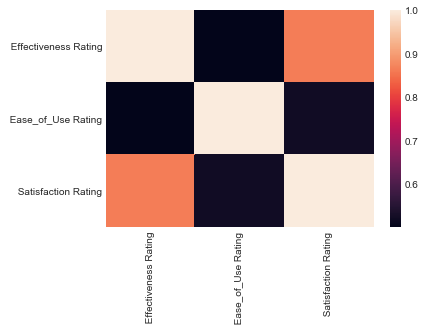

In [28]:
sns.heatmap(df2corr, xticklabels = df2corr.columns, yticklabels = df2corr.columns)

In [29]:
df2.columns

Index(['Reviewer Details', ' Effectiveness Rating', ' Ease_of_Use Rating',
       ' Satisfaction Rating', ' Comment', 'Age', 'Gender'],
      dtype='object')

In [34]:
ctab = pd.crosstab(index = df2['Gender'], columns = df2['Age'], values=df2[' Satisfaction Rating'], aggfunc=np.mean)
ctab
# sort year in decending order
ctab.sort_index(ascending = False, inplace = True)

#Classified with gender we can see how the Satisfaction Rating is with respect to Ease of Using them


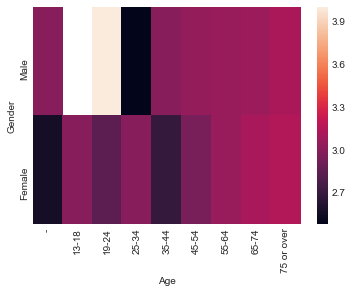

In [35]:
sns.heatmap(ctab);

1. Male customers in 19-24 age category have higher effectiveness rating
2. Whereas the opposite is true in 25-34 age category
3. Drug has different effects in males and females in different age groups


In [36]:
ctab = pd.crosstab(index = df2['Gender'], columns = df2['Age'], values=df2[' Effectiveness Rating'], aggfunc=np.mean)
ctab
# sort year in decending order
ctab.sort_index(ascending = False, inplace = True)

#Classified with gender we can see how the Satisfaction Rating is with respect to Ease of Using them


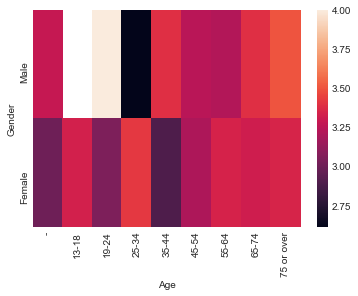

In [37]:
sns.heatmap(ctab);

In [38]:
ctab = pd.crosstab(index = df2['Gender'], columns = df2['Age'], values=df2[' Ease_of_Use Rating'], aggfunc=np.mean)
ctab
# sort year in decending order
ctab.sort_index(ascending = False, inplace = True)

#Classified with gender we can see how the Satisfaction Rating is with respect to Ease of Using them


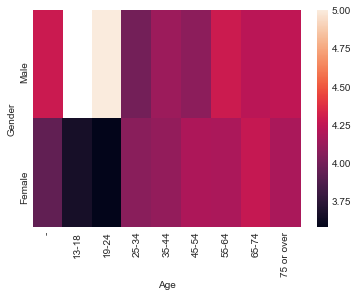

In [39]:
sns.heatmap(ctab);

In [40]:
ctab = pd.crosstab(index = df2['Gender'], columns = df2[' Effectiveness Rating'], values=df2[' Satisfaction Rating'], aggfunc=np.mean)
ctab
# sort year in decending order
ctab.sort_index(ascending = False, inplace = True)

#Classified with gender we can see how the Satisfaction Rating is with respect to Ease of Using them

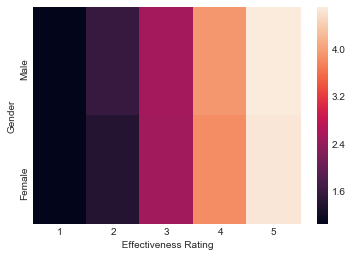

In [41]:
sns.heatmap(ctab);

## 3. NLP - TFIDF Vectorization

In [42]:
import nltk, re, string
from nltk.corpus import stopwords
# library for normalization
from sklearn.preprocessing import normalize
from wordcloud import WordCloud
from textblob import Word
# numpy is the package for matrix caculation
import numpy as np  
import pprint



In [80]:
df3=df2
df3.head()
len(df3)

999

In [81]:
comments=df3[' Comment']
#Removing the punctuations
comments=comments.str.replace('[^\w\s]','')
comments.head()

0    A few years ago a doctor at an urgent care cli...
1    After my neck fusion to my cervical C567 bone ...
2        Its been ok but had others that worked better
3    Severe neuropathic pain in left leg into my to...
4    Pain relief was minimal I had almost all the s...
Name:  Comment, dtype: object

In [128]:
docs=(comments.tolist())
len(docs)
#Removing stopwords
stop_words = stopwords.words('english')
morewords=['help','still','take','mg','susbstance','work','turky']
stop_words.extend(morewords)

In [129]:
def get_doc_tokens(doc):
    tokens=[token.strip() \
            for token in nltk.word_tokenize(doc.lower()) \
            if token.strip() not in stop_words and\
               token.strip() not in string.punctuation]
    
    # you can add bigrams, collocations, or lemmatization here
    
    # create token count dictionary
    token_count=nltk.FreqDist(tokens)
    
    # or you can create dictionary by yourself
    #token_count={token:tokens.count(token) for token in set(tokens)}
    tt = token_count.most_common()
    print(type(token_count))
    #print(get_doc_tokens(doc))
    return token_count
    #print(token_count)

# step 2. process all documents to 
# a dictionary of dictionaries
docs_tokens={idx:get_doc_tokens(doc) \
             for idx,doc in enumerate(docs)}
#print(docs_tokens)

<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.Fre

<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.Fre

<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.Fre

In [130]:
dtm=pd.DataFrame.from_dict(docs_tokens, orient="index" )
dtm=dtm.fillna(0)
len(dtm)


993

In [131]:
tf=dtm.values

# sum the value of each row
doc_len=tf.sum(axis=1)
#print(doc_len)

# divide dtm matrix by the doc length matrix
tf=np.divide(tf, doc_len[:,None])
print(tf)

[[0.01694915 0.01694915 0.01694915 ... 0.         0.         0.        ]
 [0.01459854 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.09090909 0.09090909 0.        ]
 [0.         0.         0.         ... 0.         0.         0.05882353]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [132]:
#Getting Inverse Document Frequency
df=np.where(tf>0,1,0)
#df
idf=np.log(np.divide(len(docs), \
        np.sum(df, axis=0)))+1
print("\n-------IDF Matrix-------")
print (idf)


smoothed_idf=np.log(np.divide(len(docs)+1, np.sum(df, axis=0)+1))+1
print("\n-------Smoothed IDF Matrix-------")
print(smoothed_idf)



-------IDF Matrix-------
[3.06256769 4.14555466 3.52472814 ... 7.90675478 7.90675478 7.90675478]

-------Smoothed IDF Matrix-------
[3.05572502 4.12356565 3.51330612 ... 7.2146081  7.2146081  7.2146081 ]


In [133]:
#Calculating TF-IDF
print("\n\t\t-------TF-IDF Matrix-------")
tf_idf=normalize(tf*idf)
print(tf_idf)

print("\n\t\t-------Smoothed TF-IDF Matrix-------")
smoothed_tf_idf=normalize(tf*smoothed_idf)
print(smoothed_tf_idf)
len(tf)


		-------TF-IDF Matrix-------
[[0.06995655 0.09469462 0.08051343 ... 0.         0.         0.        ]
 [0.0777983  0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.42005991 0.42005991 0.        ]
 [0.         0.         0.         ... 0.         0.         0.35944078]
 [0.         0.         0.         ... 0.         0.         0.        ]]

		-------Smoothed TF-IDF Matrix-------
[[0.07245069 0.097769   0.08329985 ... 0.         0.         0.        ]
 [0.08060806 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.40409581 0.40409581 0.        ]
 [0.         0.         0.         ... 0.         0.         0.33714059]
 [0.         0.         0.         ... 0.         0.         0.        ]]


993

In [134]:
#Obtaining top 5 words in each doc by tfidf weight
top=smoothed_tf_idf.argsort()[:,::-1][:,0:5]
#top
top5=[]
for row in top:
    s=([dtm.columns[x] for x in row])
    top5.append(s)


In [135]:
#Adding new column to the df with top 5 words 
df3=df3[0:993]
df3['top5']=top5            
#df3['top5'].head()
df3.head()

,Reviewer Details,Effectiveness Rating,Ease_of_Use Rating,Satisfaction Rating,Comment,Age,Gender,top5
0,virleo| 55-64 Female on Treatment for less t...,1,1,1,A few years ago a doctor at an urgent care cli...,55-64,Female,"[infection, prescribed, vicodin, needed, paper]"
1,Mtdwnurse1| 45-54 Female on Treatment for 6 ...,4,4,4,After my neck fusion to my cervical C5|6|7| bo...,45-54,Female,"[bind, everyone, fusion, receptor, taper]"
2,Foots55| 65-74 Female on Treatment for 1 to ...,3,2,2,Its been ok but had others that worked better,65-74,Female,"[ok, others, worked, better, clinc]"
3,GoneRacin24| 65-74 Female on Treatment for 1...,1,5,1,Severe neuropathic pain in left leg into my to...,65-74,Female,"[nerve, test, feel, toes, neuropathic]"
4,75 or over Male on Treatment for less than 1...,2,5,1,Pain relief was minimal. I had almost all the ...,75 or over,Male,"[frequent, sideaffects, tiredness, urination, ..."


In [136]:
male=df3.loc[df3['Gender'] == 'Male']
female=df3.loc[df3['Gender'] == 'Female']

In [137]:
import itertools

In [138]:
mlist=list(itertools.chain.from_iterable(male['top5']))
mlist=" ".join(mlist)
flist=list(itertools.chain.from_iterable(female['top5']))
flist=" ".join(flist)

## 4. Worldclouds 
Wordcluds for male and female patients formed by gahtering top 5 words from each document with respect to thier TFIDF weights

In [139]:
wordcloudm = WordCloud(background_color="white",colormap="viridis").generate(mlist)

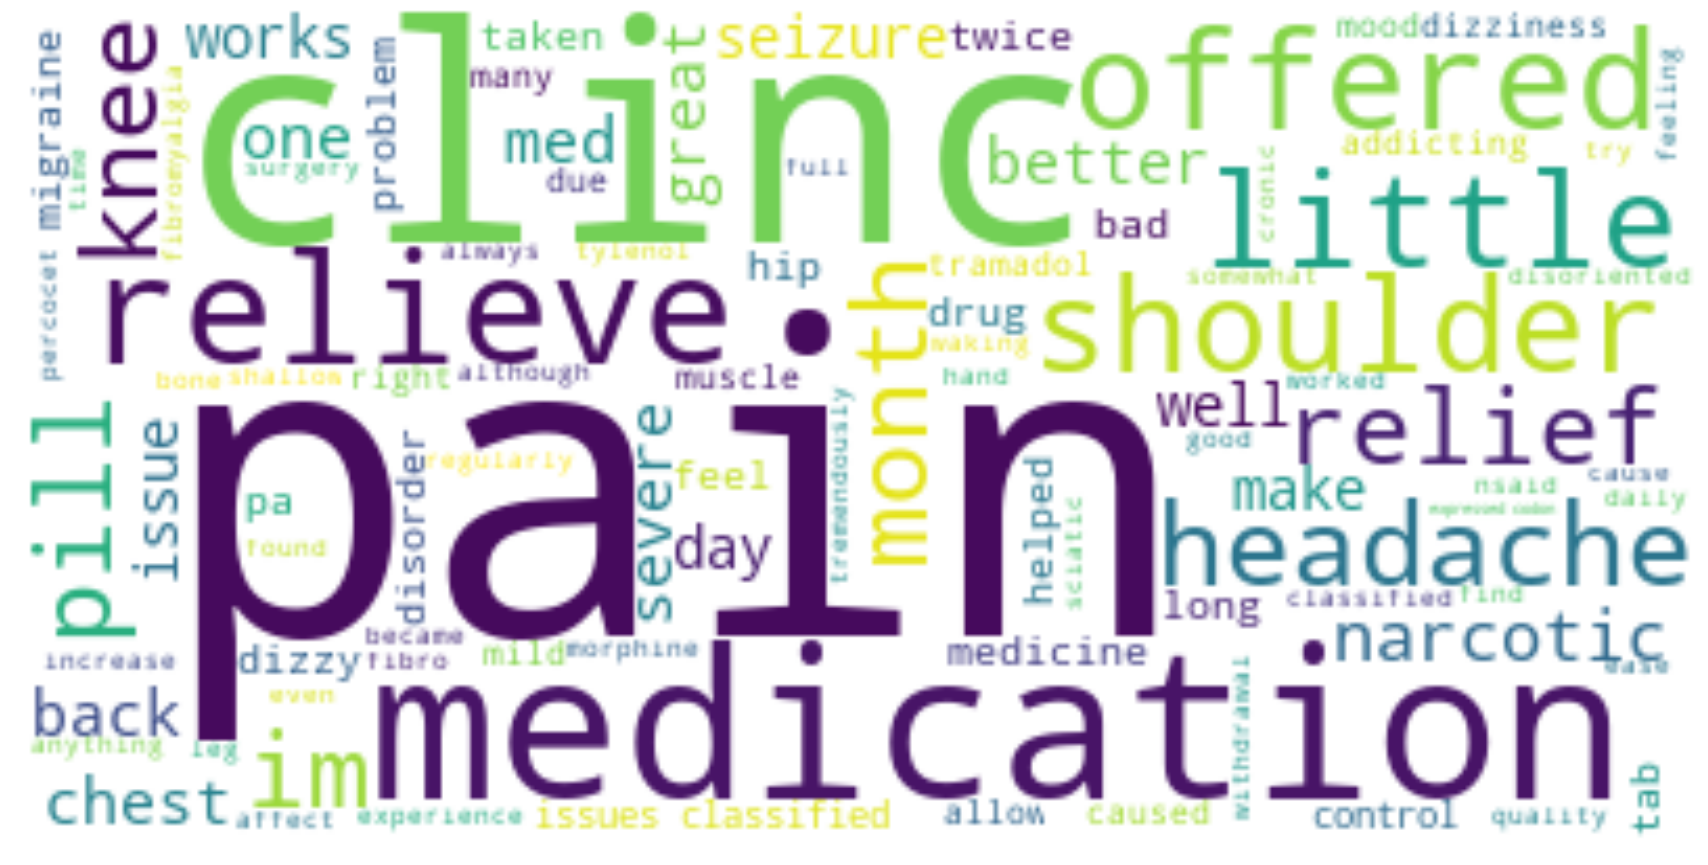

In [140]:
plt.figure(figsize = (30,30))
plt.imshow(wordcloudm,interpolation='bilinear')
plt.axis("off")
plt.show()

In [141]:
wordcloudf = WordCloud(background_color="white",colormap="inferno").generate(flist)

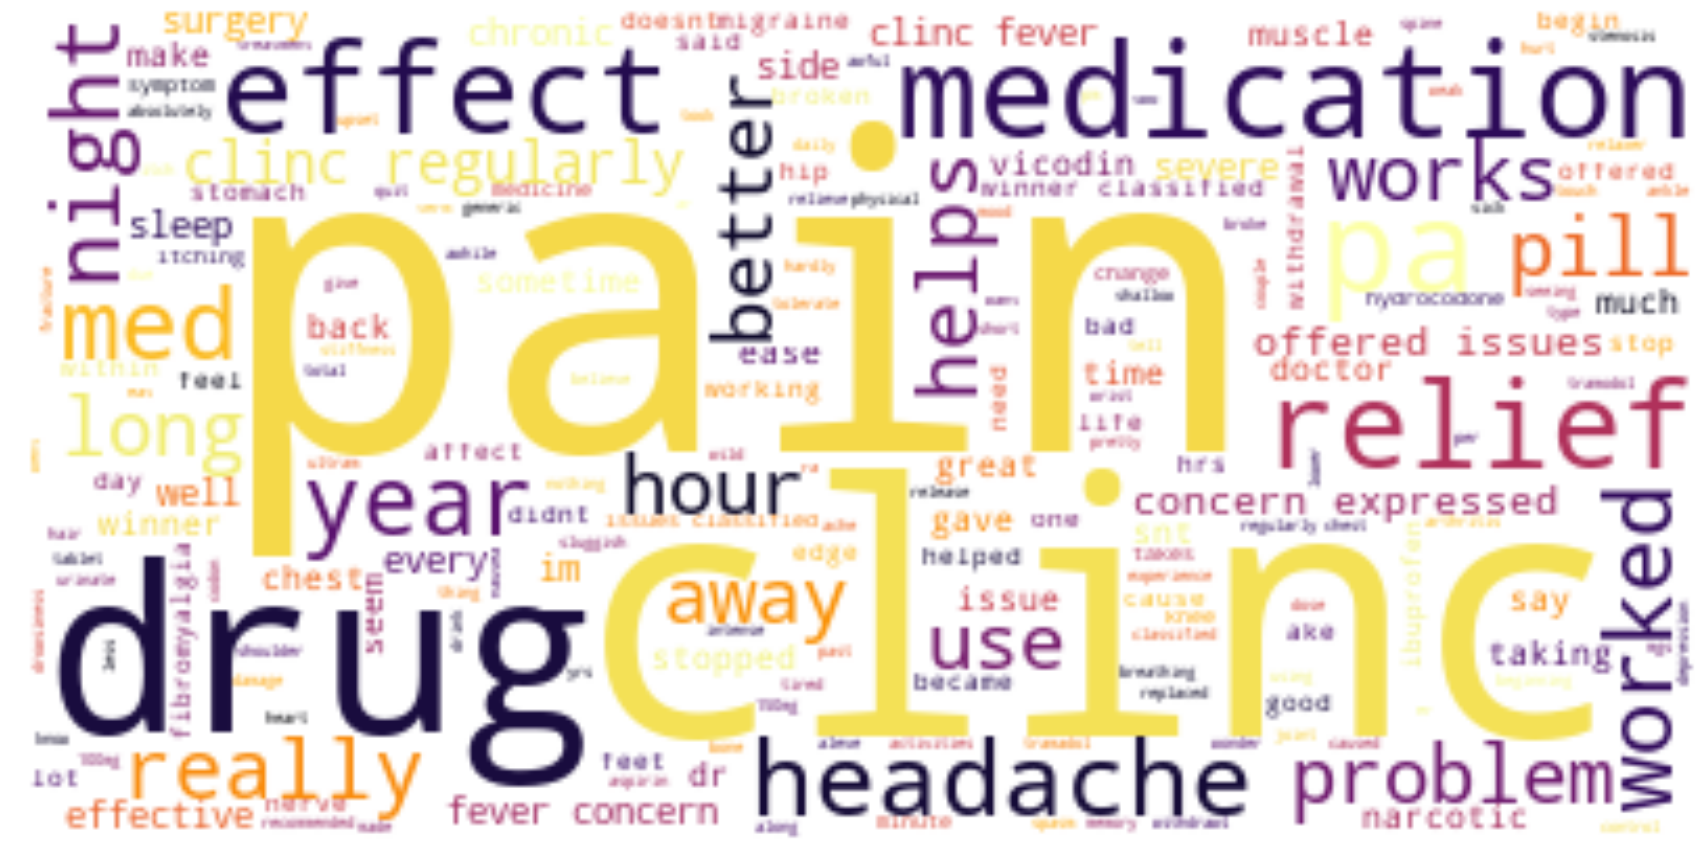

In [142]:
#WordCloud for Female 
plt.figure(figsize = (30,30))
plt.imshow(wordcloudf,interpolation='bilinear')
plt.axis("off")
plt.show()

### Advance NLP - Side Effects study

In [143]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize


In [154]:
comments=df2[ ' Comment']
comments[1]

'After my neck fusion to my cervical C5|6|7| bone spur removal| and spinal stenosis plus suffering from ankylosing spondylitis I was on dilaudid for 2 weeks post op| at my 2 week follow up I asked to taper to percocet| several weeks later I then asked to taper to tramadol and Celebrex. 9 months later my neck feels better but living with AS| which there is no cure| can be debilitating. The occasional tramadol and daily Celebrex have worked wonders for me at this time. Prior to my cervical fusion 4 years prior I had a Lumbar L4-5 fusion which finally has healed as well. Tramadol may not be for everyone or work on everyone but I\'ve had good results. You have to figure out what least amount of mind alternating drug works for you. If it\'s truly for pain that a person is taking it for it should bind to the pain receptors and help with the pain. If it\'s not for pain then it doesn\'t have a receptor to bind to causing a "high". If it doesn\'t work the receptor in your brain may need a diffe

In [155]:
#Indicates if Theres side effect or not in comments
noOfHits = []
for j in range(len(comments)):
    temp = comments[j]
    if temp.lower().find("side-effect".lower()) !=-1 or temp.lower().find("side-effects".lower()) !=-1 or temp.lower().find("side effects".lower()) != -1 or temp.lower().find("side effect".lower()) !=-1 :
        noOfHits.append("Yes")
    else:
        noOfHits.append("No")
        
noOfHits.count("No") - noOfHits.count("Yes")

715

In [156]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

In [157]:
sid = SentimentIntensityAnalyzer()

In [158]:
polarity = []
for i in range(len(comments)):
    polarity.append(list(sid.polarity_scores(comments[i]).values()))

#this is just validation
#print(len(polarity), ": ", len(astring))

In [159]:
negVar = []
neuVar = []
posVar = []
compVar = []

for i in range(len(polarity)):
    negVar.append(polarity[i][0]) 
    neuVar.append(polarity[i][1])
    posVar.append(polarity[i][2]) 
    compVar.append(polarity[i][3]) 
    
#this is just validation

#negVar[2] 
#neuVar[2] 
#posVar[2] 
#compVar[2]
#polarity[2]

In [160]:
#len(posVar)
#len(neuVar)
#len(compVar)
#len(negVar)
#len(astring)
#len(noOfHits)

In [161]:
sentiDF = pd.DataFrame(                                       #Creating a df of drug name and number of reviews for that drug
    {'Comment': comments,
     'Positive': posVar,
     'Negative': negVar,
     'Neutral': neuVar,
     'Compound': compVar,
     'SideEffect_YesNo': noOfHits
    })

sentiDF.head()

,Comment,Compound,Negative,Neutral,Positive,SideEffect_YesNo
0,A few years ago a doctor at an urgent care cli...,0.3336,0.098,0.794,0.108,No
1,After my neck fusion to my cervical C5|6|7| bo...,-0.9545,0.154,0.733,0.113,Yes
2,Its been ok but had others that worked better,0.6652,0.000,0.562,0.438,No
3,Severe neuropathic pain in left leg into my to...,-0.9208,0.285,0.635,0.081,No
4,Pain relief was minimal. I had almost all the ...,-0.0516,0.130,0.748,0.122,No


In [162]:
sentiDF.to_csv('/Users/grv/Downloads/sentiDF.csv')

In [163]:
sentiDf_y=sentiDF[sentiDF.SideEffect_YesNo == "Yes"]
sentiDf_n=sentiDF[sentiDF.SideEffect_YesNo == "No"]

In [164]:
sentiDf_y.head()
len(sentiDf_y)

142

In [165]:
sentiDf_y.describe()

,Compound,Negative,Neutral,Positive
count,142.000000,142.000000,142.000000,142.000000
mean,-0.311454,0.143690,0.762570,0.093718
std,0.588299,0.082399,0.105645,0.073632
min,-0.992700,0.000000,0.430000,0.000000
25%,-0.836600,0.088000,0.688250,0.043250
50%,-0.451450,0.134000,0.765000,0.085000
75%,0.177900,0.195750,0.837750,0.129250
max,0.980300,0.374000,1.000000,0.404000


In [166]:
a = sentiDf_y['Comment'].str.lower().str.cat(sep=' ')
b = re.sub('[^A-Za-z]+', ' ', a)

### Stopwords
Inorder to clearly highlight some of the side-effects we had to extend the stopwords vocabulary. 

In [167]:
from stop_words import get_stop_words
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
morew=['years','take','tramadol','doctor','started','takes','two','taken'\
       ,'many','every','need','great','worked','help','really','going','many'\
      ,'took','days','months','weeks','week','taking','hour','hours','really'\
      ,'works','meds','back','day','drug','work','time','one','make','year',\
      'well','even','use','month','without','medication','med','help’,’two','pain','like','get','days','works'] 
stop_words.extend(morew)

In [168]:
from nltk import sent_tokenize, word_tokenize
word_tokens = word_tokenize(b)

In [169]:
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [172]:
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data = [word for word in without_single_chr if not word.isnumeric()] 

In [173]:
word_dist = nltk.FreqDist(cleaned_data)
rslt = pd.DataFrame(word_dist.most_common(50),
                    columns=['Word', 'Frequency'])

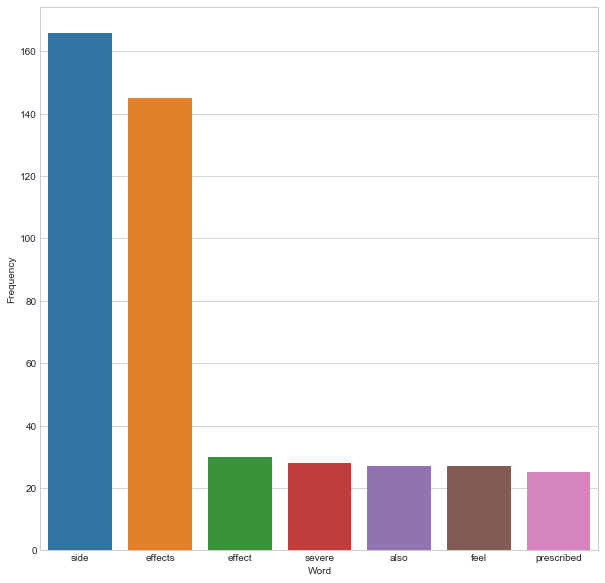

In [174]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

## 5. Worldcloud for side-effects
Some common sideeffects can easily be seen in the following wordcloud. The side-effects like __"headache"__, __"nausea"__,__"dizziness"__, and __"constipation"__ seems to be the frequently occuring once.

In [175]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (40,40))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50,colormap="inferno",collocations = True)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

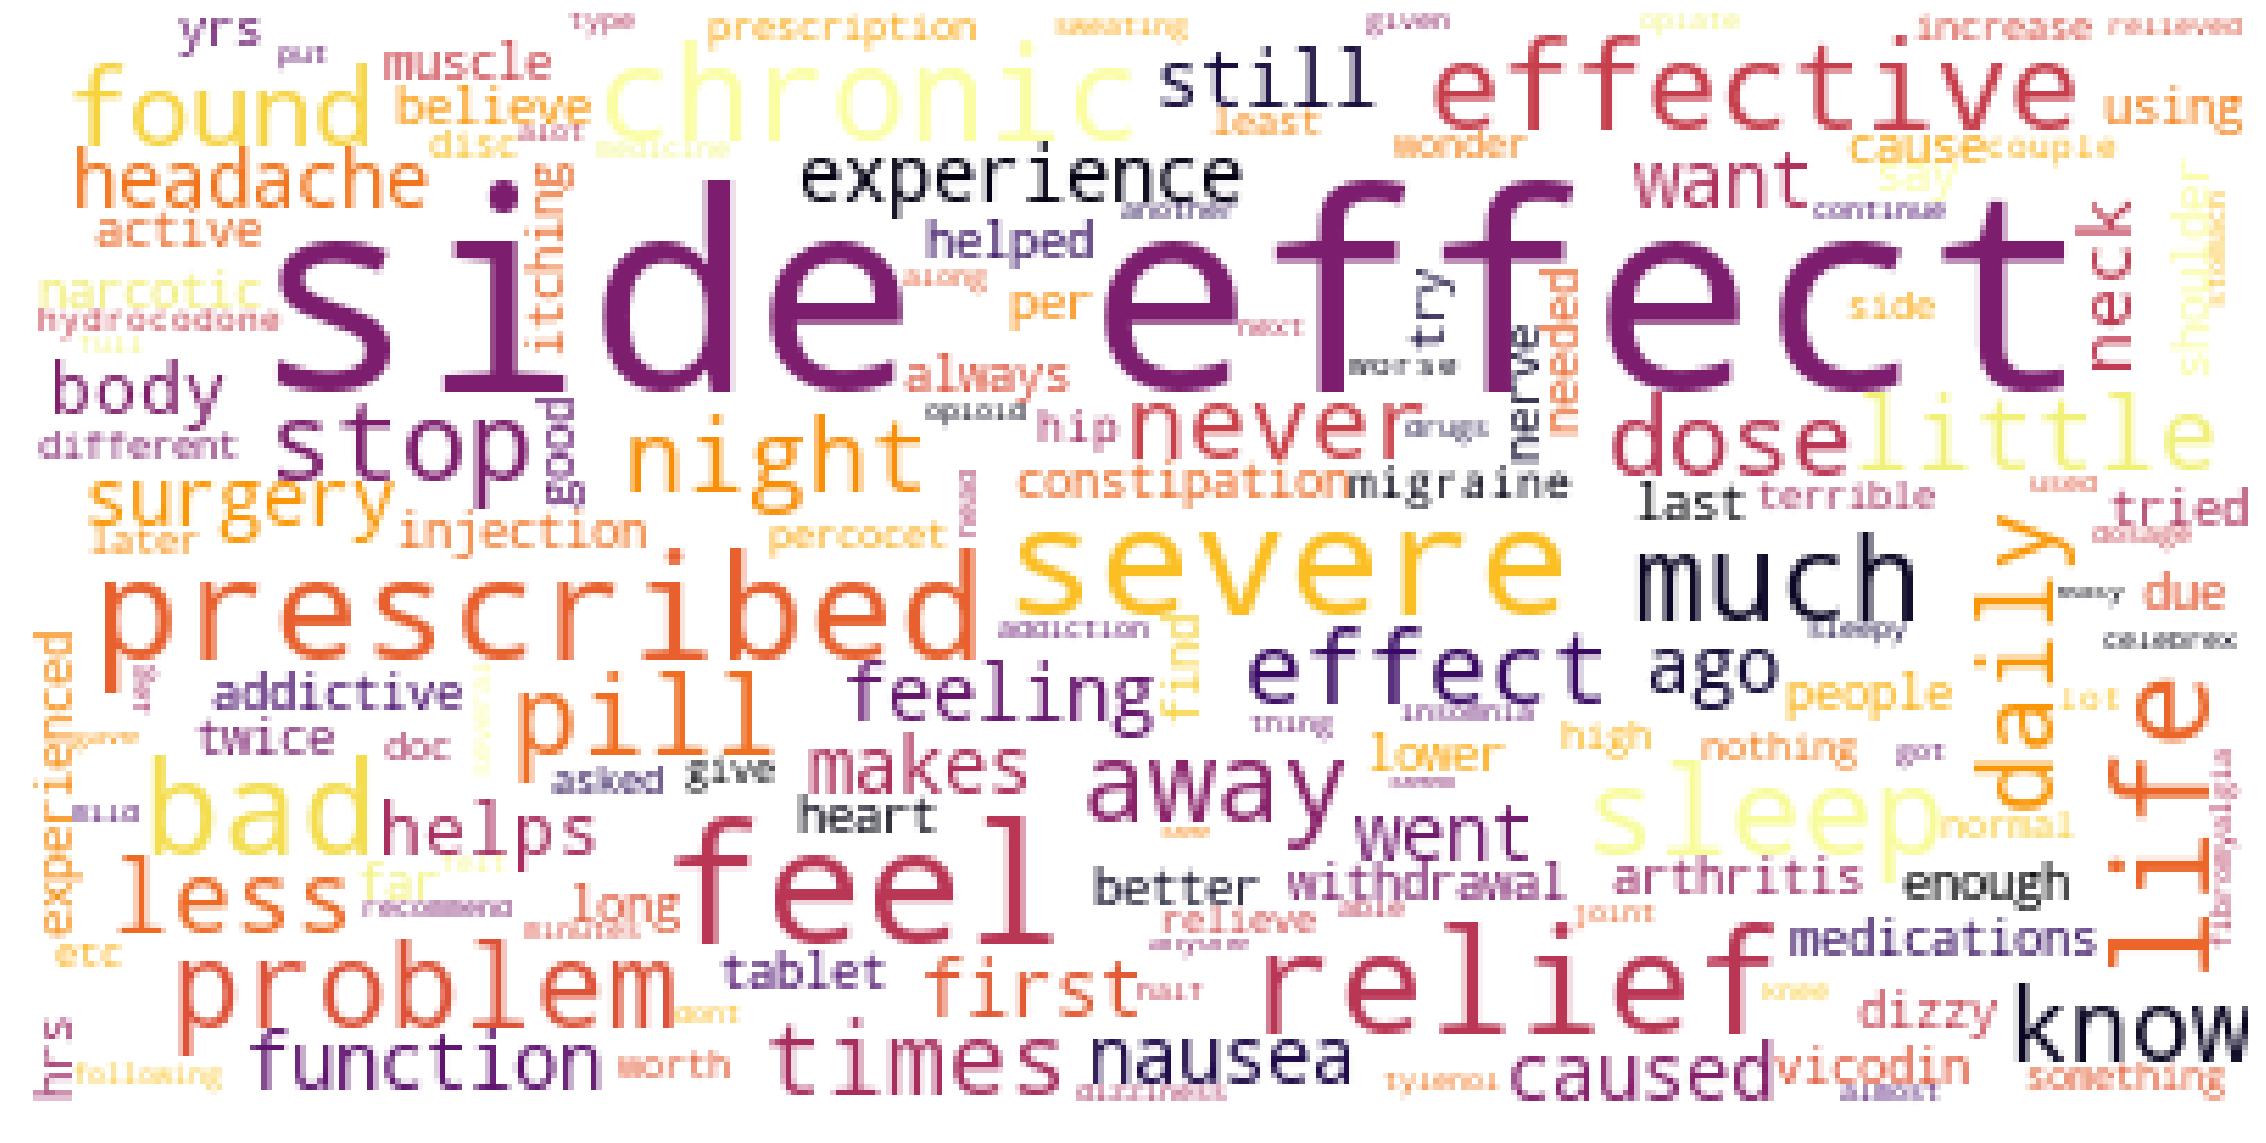

In [176]:
wc(cleaned_data,'white','Most Used Words')

In [177]:
wordlist=['nausea','addictive','constipation','dizzy','headache','itching','sweating','migraine','vomiting']

In [178]:
def wordListToFreqDict(wr):
    wordfreq = [wr.count(cleaned_data) for cleaned_data in wr]
    return dict(zip(wr,wordfreq))

In [179]:
tokens=cleaned_data
def map_tokens(tokens):
    hash_map = {}

    if tokens is not None:
        for element in tokens:
            # Remove Punctuation
            word = element.replace(",","")
            word = word.replace(".","")

            # Word Exist?
            if word in hash_map:
                hash_map[word] = hash_map[word] + 1
            else:
                hash_map[word] = 1

        return hash_map
    else:
        return None

In [180]:
map = map_tokens(tokens)

In [181]:
li2=[]
for word in wordlist:
    w=word 
    freq=str(map[word])
    li2.append((w,freq))
li2

[('nausea', '14'),
 ('addictive', '11'),
 ('constipation', '12'),
 ('dizzy', '12'),
 ('headache', '6'),
 ('itching', '9'),
 ('sweating', '6'),
 ('migraine', '4'),
 ('vomiting', '3')]

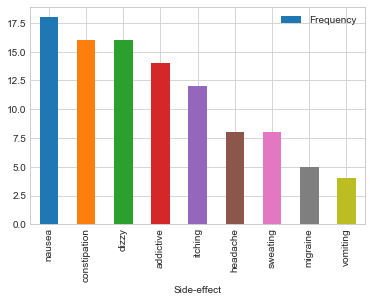

In [184]:
df2 = pd.DataFrame(li2)
df2.columns = ['Side-effect', 'Frequency']
df2["Frequency"]=df2["Frequency"].astype(float)
df2["Frequency"]=(100. * df2["Frequency"] / df2["Frequency"].sum()).round(0)
df2=df2.sort_values(by='Frequency',ascending=False)
df2.plot.bar(x='Side-effect', y='Frequency',sort_columns=True)

This shows the percentage of the numerb of time these side-effects were mention in the comments.